In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 2: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Step 4: Train the model
model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(test_images[..., np.newaxis], test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8959 - loss: 0.3373 - val_accuracy: 0.9761 - val_loss: 0.0739
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9877 - val_loss: 0.0363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9923 - loss: 0.0239 - val_accuracy: 0.9901 - val_loss: 0.0314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9906 - val_loss: 0.0315


In [6]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.9906 - loss: 0.0315
Test accuracy: 0.9905999898910522


In [8]:
# Step 6: Predict and print some outputs
predictions = model.predict(test_images[..., np.newaxis])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


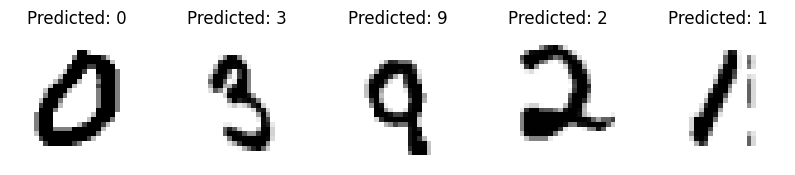

In [9]:
# Step 7: Visualize some random images along with their predicted outputs
num_images_to_show = 5
random_indices = np.random.choice(test_images.shape[0], num_images_to_show, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


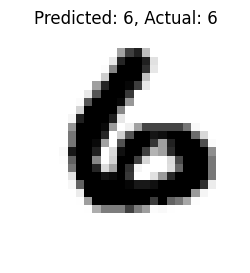

In [11]:
# Step 8: Take a specific sample image, predict its class, and show the image with the predicted label
sample_index = np.random.randint(0, test_images.shape[0])
sample_image = test_images[sample_index]

# Predict the class of the sample image
sample_prediction = model.predict(sample_image[np.newaxis, ..., np.newaxis])
predicted_class = np.argmax(sample_prediction)

# Display the sample image and the predicted label
plt.figure(figsize=(3, 3))
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_class}, Actual: {test_labels[sample_index]}")
plt.axis('off')
plt.show()

In [12]:
# Step 5: Save the model
model.save('mnist_cnn_model.keras')

# Use the model to predict a custom image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


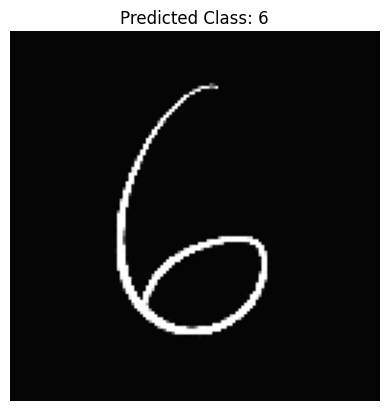

The predicted class for the uploaded image is: 6


In [13]:
# Step 1: Load the trained model
model = models.load_model('/content/mnist_cnn_model.keras')

# Step 2: Load and preprocess an image from the local machine
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Step 3: Predict the class of the uploaded image
def predict_image_class(image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)

    # Display the image along with the predicted label
    img = image.load_img(image_path, target_size=(128,128), color_mode='grayscale')
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Example Usage:
image_path = '/content/Number_6.jpeg'  # Replace with the path to your local image
predicted_class = predict_image_class(image_path)
print(f"The predicted class for the uploaded image is: {predicted_class}")

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,324 (364.55 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)